In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
proj = '56Fe'
trg = '141Pr'
cn = '197At'
bf = 0.66
ch = 'xn'
sigr = 2.5
bf_diff = 0.01

df10_mb = pd.read_csv('data/' + proj + '_' + trg + '_' + cn + '_' + ch + '_' + 'IFUS10' + '_barfac' + f'{bf:.2f}' + '_sigr' + str(sigr) + '.dat', sep='\t')
df0_mb = pd.read_csv('data/' + proj + '_' + trg + '_' + cn + '_' + ch + '_' + 'IFUS0' + '_barfac' + f'{bf:.2f}' + '_sigr' + str(sigr) + '.dat', sep='\t')

bf_low_10_mb = pd.read_csv('data/' + proj + '_' + trg + '_' + cn + '_' + ch + '_' + 'IFUS10' + '_barfac' + f'{bf-bf_diff:.2f}' + '_sigr' + str(sigr) + '.dat', sep='\t')
bf_high_10_mb = pd.read_csv('data/' + proj + '_' + trg + '_' + cn + '_' + ch + '_' + 'IFUS10' + '_barfac' + f'{bf+bf_diff:.2f}' + '_sigr' + str(sigr) + '.dat', sep='\t')

bf_low_0_mb = pd.read_csv('data/' + proj + '_' + trg + '_' + cn + '_' + ch + '_' + 'IFUS0' + '_barfac' + f'{bf-bf_diff:.2f}' + '_sigr' + str(sigr) + '.dat', sep='\t')
bf_high_0_mb = pd.read_csv('data/' + proj + '_' + trg + '_' + cn + '_' + ch + '_' + 'IFUS0' + '_barfac' + f'{bf+bf_diff:.2f}' + '_sigr' + str(sigr) + '.dat', sep='\t')
df10_mb

,E_lab,E*/MeV,190At,191At,192At,193At,194At,195At,196At,197At
0,225.249,21.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,1.250000e-11,4.350000e-09,7.100000e-13
1,226.647,22.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,3.220000e-10,1.220000e-08,8.220000e-13
2,228.044,23.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,4.470000e-09,3.280000e-08,0.000000e+00
3,229.441,24.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,4.440000e-08,8.500000e-08,0.000000e+00
4,230.838,25.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,3.590000e-07,2.120000e-07,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...
65,316.065,86.0,0.0,6.090000e-08,4.900000e-08,0.0,0.0,0.000000e+00,0.000000e+00,2.450000e+00
66,317.462,87.0,0.0,5.090000e-08,3.530000e-08,0.0,0.0,0.000000e+00,0.000000e+00,2.400000e+00
67,318.859,88.0,0.0,4.200000e-08,2.540000e-08,0.0,0.0,0.000000e+00,0.000000e+00,2.360000e+00
68,320.257,89.0,0.0,3.420000e-08,1.810000e-08,0.0,0.0,0.000000e+00,0.000000e+00,2.320000e+00


## Experimental values with errors

In [3]:
# Folden, in mb
# e_lab = [180.3,188.4,196.5,202.6,208.6,213.3,218.5]
# exp = [[np.nan,np.nan,np.nan,0.1,0.21,0.18,0.08], [0.2,1.21,2.29,1.54,0.73,0.28,0.1], [9.1,5,1.19,0.13,np.nan,np.nan,np.nan]]
# err = [[np.nan,np.nan,np.nan,0.05,0.08,0.07,0.03], [0.12,0.43,0.8,0.54,0.26,0.1,0.04], [3.3,1.8,0.44,0.06,np.nan,np.nan,np.nan]]

#boris in mb
e_exc_boris = [24, 28, 34, 40, 50]
e_lab_boris = [229, 235, 243, 251.8, 265.8]
exp_boris = [[np.nan, 19*1e-6, 180*1e-6,800*1e-6,180*1e-6], [130*1e-6, 260*1e-6,130*1e-6,38*1e-6,2.7*1e-6]]
err_boris = [[np.nan,9*1e-6,50*1e-6,240*1e-6,50*1e-6], [50*1e-6,80*1e-6,30*1e-6,10*1e-6,1.3*1e-6]]

e_lab_ritu = [230,248,266]
exp_ritu = [[np.nan,np.nan,40*1e-6], [np.nan,1.5e-3,np.nan], [900e-6,np.nan,np.nan]]

## Scaling of the values to mb, ub or nb

In [4]:
dfm10_mb = df10_mb.melt(id_vars=['E_lab', 'E*/MeV'], var_name='isotope', value_name='CS')
dfm0_mb = df0_mb.melt(id_vars=['E_lab', 'E*/MeV'], var_name='isotope', value_name='CS')

#scale the data to either nb, ub or whatever
dfm10 = dfm10_mb
dfm0 = dfm0_mb
df10 = df10_mb
df0 = df0_mb
bf_low_10 = bf_low_10_mb
bf_high_10 = bf_high_10_mb
bf_low_0 = bf_low_0_mb
bf_high_0 = bf_high_0_mb

mb = 1
ub = 1e3
nb = 1e6

scale = ub
dfm10['CS'] = dfm10_mb['CS']*scale
dfm0['CS'] = dfm0_mb['CS']*scale
df10.iloc[:,2:] = df10_mb.iloc[:,2:] * scale
df0.iloc[:,2:] = df0_mb.iloc[:,2:] * scale
bf_low_10.iloc[:,2:] = bf_low_10_mb.iloc[:,2:] * scale
bf_high_10.iloc[:,2:] = bf_high_10_mb.iloc[:,2:] * scale
bf_low_0.iloc[:,2:] = bf_low_0_mb.iloc[:,2:] * scale
bf_high_0.iloc[:,2:] = bf_high_0_mb.iloc[:,2:] * scale
dfm10.describe()
exp_boris = np.array(exp_boris) * scale
err_boris = np.array(err_boris) * scale

exp_ritu = np.array(exp_ritu) * scale

## Plotting

/tmp/ipykernel_80856/1866343595.py:10: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.lineplot(x=frame, y='CS', hue='isotope', data=dfm10[dfm10['isotope'].isin(list(df10.columns[plot_from+2:-plot_to]))], palette=colors)
/tmp/ipykernel_80856/1866343595.py:30: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.lineplot(x=frame, y='CS', hue='isotope', data=dfm0[dfm0['isotope'].isin(list(df10.columns[plot_from+2:-plot_to]))], linestyle='--', legend=None, palette=colors)
/home/adam/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


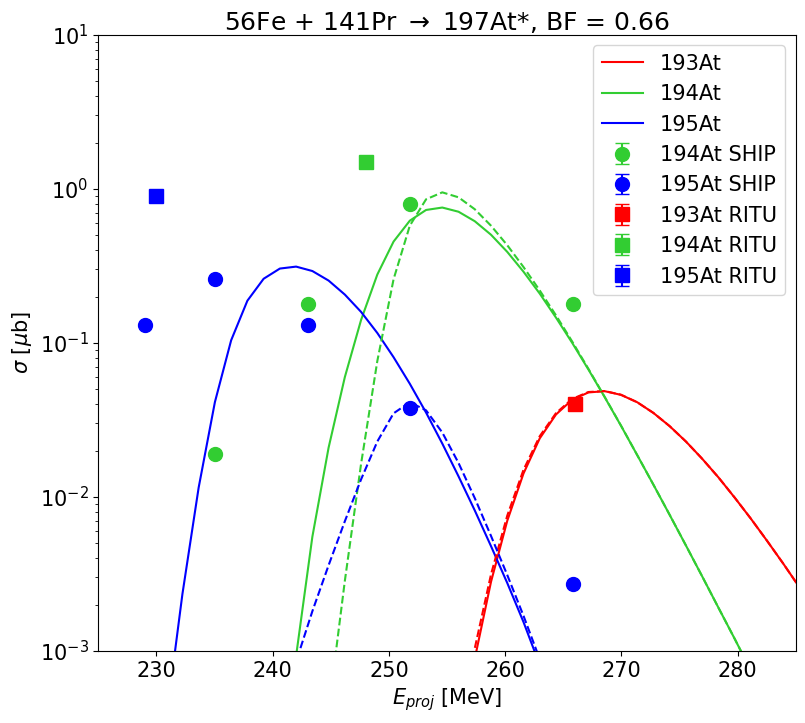

In [12]:
colors = ['red', 'limegreen', 'blue', 'gold', 'black', 'turquoise', 'magenta', 'grey', 'olive', 'brown']
sns.color_palette("dark")

plot_from = 3
plot_to = 2

frame = 'E_lab'

fig, ax = plt.subplots(figsize=(9,8))
sns.lineplot(x=frame, y='CS', hue='isotope', data=dfm10[dfm10['isotope'].isin(list(df10.columns[plot_from+2:-plot_to]))], palette=colors)
plt.semilogy()
plt.ylim(1e-3, 1e1)
if frame == 'E_lab':
    plt.xlabel('$E_{proj}$ [MeV]')
    plt.xlim(225, 285)
elif frame == 'E*/MeV':
    plt.xlabel('$E*$ [MeV]')
    plt.xlim(30, 65)
# plt.suptitle(proj + ' + ' + trg + r' $\rightarrow$ ' + cn + '*, BF = ' + str(bf) + ' $\pm$ ' + str(bf_diff) + ', sigr0 = ' + str(sigr), va='top')
plt.title(proj + ' + ' + trg + r' $\rightarrow$ ' + cn + '*, BF = ' + str(bf), va='top')
# plt.title('', va='bottom', fontsize='small')
if scale == mb:
    plt.ylabel('$\sigma$ [mb]')
elif scale == ub:
    plt.ylabel('$\sigma$ [$\mu$b]')
elif scale == nb:
    plt.ylabel('$\sigma$ [nb]')
plt.legend(loc='upper right')

sns.lineplot(x=frame, y='CS', hue='isotope', data=dfm0[dfm0['isotope'].isin(list(df10.columns[plot_from+2:-plot_to]))], linestyle='--', legend=None, palette=colors)

## assymetric errors
# for i in range(len(exp)):
#     (_, caps, _) = plt.errorbar(e_lab, exp[i], yerr=[err_min[i], err_max[i]], marker='.', capsize=5, color=colors[i], ls='none', markersize=10)
#     for cap in caps:
#         cap.set_markeredgewidth(1)

# symmetric errors
for i in range(len(exp_boris)):
    # (_, caps, _) = plt.errorbar(e_lab_boris, exp_boris[i], yerr=err_boris[i], marker='.', capsize=5, color=colors[i+1], ls='none', markersize=10, label=list(df10.columns[6+i:7+i])[0]+' SHIP')
    (_, caps, _) = plt.errorbar(e_lab_boris, exp_boris[i], yerr=0, marker='.', capsize=5, color=colors[i+1], ls='none', markersize=20, label=list(df10.columns[6+i:7+i])[0]+' SHIP')
    for cap in caps:
        cap.set_markeredgewidth(1)

for i in range(len(exp_ritu)):
    (_, caps, _) = plt.errorbar(e_lab_ritu, exp_ritu[i], yerr=0, marker='s', capsize=5, color=colors[i], ls='none', markersize=10, label=list(df10.columns[5+i:6+i])[0]+' RITU')
    for cap in caps:
        cap.set_markeredgewidth(1)

plt.legend()


# # no errors        
# for i in range(len(exp)):
#     (_, caps, _) = plt.errorbar(e_lab, exp[i], yerr=0, marker='.', capsize=5, color=colors[i], ls='none', markersize=10)
#     for cap in caps:
#         cap.set_markeredgewidth(1)

if frame == 'E*/MeV':
    dfm_frame = 1
    en_frame = 'Eexc'
elif frame == 'E_lab':
    dfm_frame = 0
    en_frame = 'Elab'
    
alpha_value = 0.1
# for i in range(plot_from+2, len(df10.columns)-plot_to):
#     plt.fill_between(df10.iloc[:, dfm_frame],  df10.iloc[:, i], bf_low_10.iloc[:, i], color=colors[i-plot_from-2], alpha = alpha_value)
#     plt.fill_between(df10.iloc[:, dfm_frame],  df10.iloc[:, i], bf_high_10.iloc[:, i], color=colors[i-plot_from-2], alpha = alpha_value)
#     plt.fill_between(df0.iloc[:, dfm_frame],  df0.iloc[:, i], bf_low_0.iloc[:, i], color=colors[i-plot_from-2], alpha = alpha_value)
#     plt.fill_between(df0.iloc[:, dfm_frame],  df0.iloc[:, i], bf_high_0.iloc[:, i], color=colors[i-plot_from-2], alpha = alpha_value)

plt.rcParams.update({'font.size': 15})

plt.savefig(proj + '_' + trg + '_' + cn + '_' + ch + '_barfac' + str(bf) + '_sigr' + str(sigr) + '_' + en_frame + '.png', bbox_inches='tight')
plt.savefig(proj + '_' + trg + '_' + cn + '_' + ch + '_barfac' + str(bf) + '_sigr' + str(sigr) + '_' + en_frame + '.pdf', bbox_inches='tight')

In [96]:
list(df10.columns[4:5])[0]

'192At'